# Importing Libraries and Dataset

In [1]:
#Importing libraries and setting the size parameter of sns plot
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
#loading the dataset
df=pd.read_csv('1806447.csv')
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR systems,2020-01-15 00:00:00,2020.0,1.930347e+09,2020-01-03,20200103,20200103,20200118.0,USD,RV,1.0,NaN,66098.08,20200103.0,NAH4,1.930347e+09,0
1,U001,0200769623,WAL-MAR associates,2019-08-05 00:00:00,2019.0,1.929651e+09,2019-07-25,20190723,20190725,20190809.0,USD,RV,1.0,NaN,56060.97,20190725.0,NAH4,1.929651e+09,0
2,CA02,0140105686,SYSC foundation,2019-07-25 00:00:00,2019.0,2.960562e+09,2019-07-06,20190706,20190706,20190723.0,CAD,RV,1.0,NaN,25177.49,20190713.0,CA10,2.960562e+09,0
3,U001,0200722444,PERFOR,2019-06-10 00:00:00,2019.0,1.929061e+09,2019-04-01,20190401,20190401,20190416.0,USD,RV,1.0,NaN,33048.42,20190401.0,NAA8,1.929061e+09,0
4,U001,0200418007,AM,2019-08-28 00:00:00,2019.0,1.929720e+09,2019-08-13,20190808,20190813,20190828.0,USD,RV,1.0,NaN,16660.07,20190813.0,NAA8,1.929720e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200720419,THUR systems,NaN,2020.0,1.930647e+09,2020-03-17,20200313,20200317,20200401.0,USD,RV,1.0,NaN,20254.21,20200317.0,NAA8,1.930647e+09,1
49996,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930584e+09,2020-03-01,20200229,20200301,20200316.0,USD,RV,1.0,NaN,51306.60,20200301.0,NAH4,1.930584e+09,1
49997,U001,0200773364,U R M llc,NaN,2020.0,1.930789e+09,2020-04-17,20200415,20200417,20200502.0,USD,RV,1.0,NaN,68617.39,20200417.0,NAA8,1.930789e+09,1
49998,U001,0200762301,C&S WH co,NaN,2020.0,1.930789e+09,2020-04-14,20200415,20200414,20200429.0,USD,RV,1.0,NaN,91309.01,20200414.0,NAC6,1.930789e+09,1


# Data Preprocessing

In [3]:
pd.Series(df.dtypes) #learning the datatypes of the dataset

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [4]:
df=df[df.columns[[0,1,2,4,5,7,10,11,12,13,14,16,17,18,8,15,6,9,3]]]
#Shifting the clear date and due in date at the end for a better understanding.

In [5]:
df.shape #cheking the no of rows and columns in the dataset

(50000, 19)

In [6]:
Test1=df[df['clear_date'].isnull()].copy()
#segregating the rows in a new dataset whose clear date is null(this dataset is our main Test set)

In [7]:
#creating the main set(this will include our train val and test sets)
Base=df[df['clear_date'].notnull()].copy()
print(Base.shape)

#finding the quasi constant and constant features by calculating the percentage of unique values of a column as,variance threshold
#does not work on a dataset that contains object type values.

(45653, 19)


In [8]:
# drop constant and quasi constant features
#from sklearn.feature_selection import VarianceThreshold
#filter=VarianceThreshold(threshold=0.01)
#filter.fit(x)
#print(len(Base.columns[filter.get_support()]))
#print(
  #  len([
   #      x for x in Base.columns
    #    if x not in Base.columns[filter.get_support()]
    #]))

#q_col=[x for x in Base.columns if x not in Base.columns[filter.get_support()]]
#print(Base.shape[1])
#Base.drop(columns=q_col,axis=1,inplace=True)

#From here i found that variance threshold dosent work on objectvariables

In [9]:
Base.describe()
#Here we can observer that some columns have standard deviation=0 like isOpen,posting_id.(constant features)

#Therefore both of the columns are incapable of contributing in the performance of model, so i will drop them.

#Another thing that we can see through the dataset is that area_business has NaN values throughout the column so its better
#to drop this column too.

,buisness_year,doc_id,document_create_date,posting_id,area_business,total_open_amount,invoice_id,isOpen,document_create_date.1,baseline_create_date,due_in_date
count,45653.000000,4.565300e+04,4.565300e+04,45653.0,0.0,45653.000000,4.564900e+04,45653.0,4.565300e+04,4.565300e+04,4.565300e+04
mean,2019.131820,2.012837e+09,2.019179e+07,1.0,NaN,32387.402995,2.012181e+09,0.0,2.019182e+07,2.019182e+07,2.019199e+07
std,0.338299,2.867959e+08,3.249328e+03,0.0,NaN,40174.363453,2.781124e+08,0.0,3.234041e+03,3.236253e+03,3.279762e+03
min,2019.000000,1.928483e+09,2.018123e+07,1.0,NaN,0.240000,1.928483e+09,0.0,2.018062e+07,2.018062e+07,2.018063e+07
25%,2019.000000,1.929179e+09,2.019041e+07,1.0,NaN,4763.230000,1.929179e+09,0.0,2.019041e+07,2.019041e+07,2.019043e+07
50%,2019.000000,1.929732e+09,2.019072e+07,1.0,NaN,17336.620000,1.929732e+09,0.0,2.019072e+07,2.019072e+07,2.019081e+07
75%,2019.000000,1.930207e+09,2.019103e+07,1.0,NaN,46827.210000,1.930207e+09,0.0,2.019103e+07,2.019103e+07,2.019112e+07
max,2020.000000,9.500000e+09,2.020023e+07,1.0,NaN,848143.420000,2.960617e+09,0.0,2.020023e+07,2.020041e+07,2.020062e+07


In [10]:
print(Base['document type'].value_counts()/Base.shape[0])
print(Base['posting_id'].value_counts()/Base.shape[0])
print(Base['isOpen'].value_counts()/Base.shape[0])
#rechecking this theory by calculating the percentage of unique values in these columns

RV    0.999912
X2    0.000088
Name: document type, dtype: float64
1.0    1.0
Name: posting_id, dtype: float64
0    1.0
Name: isOpen, dtype: float64


In [11]:
Base.duplicated().sum()
#checking if the rows are dupilcated

#As in my dataset the number of duplicated rows is already 0 so i have not written any code for dropping these values.

0

In [12]:
drop1=list(filter(lambda keys: Base[keys].value_counts().max()> 0.99*Base.shape[0],Base.keys()))
print(drop1)
drop1=[]
#creating the list of the columns that have quasi constant features as i will not drop them, will just segregate
#these columns from the dataset as these could be required later in creating a feature.

['document type', 'posting_id', 'isOpen']


In [13]:
print(Base.isnull().sum())
#checking the number of null values in each column of the data set
Base.drop(columns=['document_create_date','area_business','posting_id','isOpen'],axis=1,inplace=True)
#dropping the constant and null prone column from the dataset as they are of no use.
print(Base.shape)


business_code                 0
cust_number                   0
name_customer                 0
buisness_year                 0
doc_id                        0
document_create_date          0
invoice_currency              0
document type                 0
posting_id                    0
area_business             45653
total_open_amount             0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
document_create_date.1        0
baseline_create_date          0
posting_date                  0
due_in_date                   0
clear_date                    0
dtype: int64
(45653, 15)


In [14]:
# x=Base.invoice_id.max()+1
#p=[]
#for i in range(4):
 #   p.append(x+i)
#Base["invoice_id"].fillna(pd.Series(p), inplace = True) 
#Base["invoice_id"].isnull().sum()

#here i thought of giving unique values to the null values in invoice id as just dropping them would lead to data loss but after
#my eda i found that x2 document dont have any invoice id.

In [15]:
def todatetime(df):
    df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')
    df['due_in_date']=pd.to_datetime(df['due_in_date'] , format='%Y%m%d')
    df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'] , format='%Y%m%d')
    df['clear_date']=pd.to_datetime(df['clear_date'])
    df['posting_date']=pd.to_datetime(df['posting_date'])
    return df
Base=todatetime(Base)
df.dtypes

#For doing preprocessing on Date Type column, we first need to convert them into a format which is fit to use.
#so converting all the date Type column into yyyy-mm-dd format, it also maintains uniformity throughout the dataset.


business_code              object
cust_number                object
name_customer              object
buisness_year             float64
doc_id                    float64
document_create_date        int64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
document_create_date.1      int64
baseline_create_date      float64
posting_date               object
due_in_date               float64
clear_date                 object
dtype: object

Sanity Checking


doc create date <= posting date <= baseline date <= due_in_date <= clear_date<=due_in_date



In [16]:
def sanitycheck(df):
    df=df[df['due_in_date'] >= df['document_create_date.1']]
    df=df[df['due_in_date'] >= df['posting_date']]
    df=df[df['due_in_date'] >= df['baseline_create_date']]
    df=df[df['clear_date'] >= df['document_create_date.1']]
    df=df[df['clear_date'] >= df['posting_date']]
    df=df[df['clear_date'] >= df['baseline_create_date']]
    df=df[df['baseline_create_date'] >= df['document_create_date.1']]
    df=df[df['baseline_create_date'] >= df['posting_date']]
    df=df[df['posting_date'] >= df['document_create_date.1']]
    return df
#removing the anomalies beacuse if they are not removed they will greately hinder our model performance.

In [17]:
Base=sanitycheck(Base)
Base.shape[0]
#running the sanitycheck function on the main set

43595

# Test_Train_Val DataSet splitting-

In [18]:
Base.sort_values(by='document_create_date.1',inplace=True,ignore_index=True)
Base.head(100)
#Sorting the dataset according to Document_create_date.1 
#because we will train our models based on past data, Validate(Hypertune) our data on present and predict on future data.

,business_code,cust_number,name_customer,buisness_year,doc_id,invoice_currency,document type,total_open_amount,cust_payment_terms,invoice_id,document_create_date.1,baseline_create_date,posting_date,due_in_date,clear_date
0,U001,0200769623,WAL-MAR in,2019.0,1.928540e+09,USD,RV,17005.64,NAH4,1.928540e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,2019-01-15
1,U001,0200772670,ASSOCIAT co,2019.0,1.928543e+09,USD,RV,31579.48,NAU5,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,2019-01-14
2,U001,0200769623,WAL-MAR us,2019.0,1.928536e+09,USD,RV,16358.52,NAH4,1.928536e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,2019-01-15
3,U001,0200769623,WAL-MAR systems,2019.0,1.928539e+09,USD,RV,26948.26,NAH4,1.928539e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,2019-01-09
4,U001,0200769623,WAL-MAR,2019.0,1.928540e+09,USD,RV,31409.33,NAH4,1.928540e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,2019-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,U001,0200765011,MAINES,2019.0,1.928532e+09,USD,RV,39335.51,NAD1,1.928532e+09,2018-12-31,2018-12-31,2018-12-31,2019-01-20,2019-01-22
96,U001,0200357714,US associates,2019.0,1.928546e+09,USD,RV,71826.58,NAA8,1.928546e+09,2018-12-31,2018-12-31,2018-12-31,2019-01-15,2019-01-18
97,U001,0200769623,WAL-MAR co,2019.0,1.928544e+09,USD,RV,51658.90,NAH4,1.928544e+09,2018-12-31,2018-12-31,2018-12-31,2019-01-15,2019-01-10
98,U001,0200793088,DEMOU associates,2019.0,1.928541e+09,USD,RV,20128.32,NAA8,1.928541e+09,2018-12-31,2018-12-31,2018-12-31,2019-01-15,2019-01-15


In [19]:
Base['delay'] = Base.apply(lambda d: d.clear_date - d.due_in_date, axis = 1) 
Base['delay'] = Base['delay'].dt.days.astype('int16')
print(Base.dtypes)
print(Base.shape)

#Creating delay column, this will be our target variable

business_code                     object
cust_number                       object
name_customer                     object
buisness_year                    float64
doc_id                           float64
invoice_currency                  object
document type                     object
total_open_amount                float64
cust_payment_terms                object
invoice_id                       float64
document_create_date.1    datetime64[ns]
baseline_create_date      datetime64[ns]
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
clear_date                datetime64[ns]
delay                              int16
dtype: object
(43595, 16)


In [20]:
x=Base.iloc[:,:14]
y=Base.iloc[:,-1]
#segregating the target variable from other columns and ignoring the clear date column (which is the 14 th column) as, if clear
#date is taken as a feature it will lead to data leak.

In [21]:
x.dtypes
#checking the columns and their data type in the x data set.

business_code                     object
cust_number                       object
name_customer                     object
buisness_year                    float64
doc_id                           float64
invoice_currency                  object
document type                     object
total_open_amount                float64
cust_payment_terms                object
invoice_id                       float64
document_create_date.1    datetime64[ns]
baseline_create_date      datetime64[ns]
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
dtype: object

In [22]:
y=pd.DataFrame(y)
#converting the delay series to dataframe format so that future operations can be done with it like concatenation.

In [23]:
#splitting the dataset into train, validation and test set
#Train set=80%
#Validation set= 10%
#Test Set= 10%
#with no shuffling.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x.copy(), y.copy(), test_size=0.1,shuffle=False,stratify = None)
x_train, x_val, y_train, y_val = train_test_split(
    x_train.copy(), y_train.copy(), test_size=0.1,shuffle=False,stratify = None)

In [24]:
x1test=x_test.copy()
#copying the x_test set to another dataset so that after delay prediction clearing date can be compared to the predicted clear date.

In [25]:
x_train['document_create_date.1'].dt.year.value_counts()


2019    35162
2018      149
Name: document_create_date.1, dtype: int64

In [26]:
x_val['document_create_date.1'].dt.year.value_counts()

2019    2851
2020    1073
Name: document_create_date.1, dtype: int64

In [27]:
x_test['document_create_date.1'].dt.year.value_counts()

2020    4360
Name: document_create_date.1, dtype: int64

# EDA

In [28]:
#EDA is done only on train data

In [29]:
x_train.nunique()
#from here we can deduce that ids wont be use as a feature as they are unique and their unique values are nearly equal to 
#the train dataset size.

business_code                 6
cust_number                1344
name_customer              3810
buisness_year                 1
doc_id                    35311
invoice_currency              2
document type                 1
total_open_amount         32092
cust_payment_terms           63
invoice_id                35311
document_create_date.1      327
baseline_create_date        335
posting_date                327
due_in_date                 366
dtype: int64

In [30]:
#now i checked the correlation between document create date.1 and baseline_create_date and posting date
#as their unique values are nearly same
ck=x_train[['document_create_date.1','baseline_create_date','posting_date']].copy()
pk=ck.apply(pd.to_numeric)
pk.corr()


,document_create_date.1,baseline_create_date,posting_date
document_create_date.1,1.000000,0.999874,1.000000
baseline_create_date,0.999874,1.000000,0.999874
posting_date,1.000000,0.999874,1.000000


In [31]:
#from the corr analysis between the the date features i deduced that baseline_create_date and posting_date can be dropped
#as they do not variate much from document_create_date.1(right now i am putting the two columns in the drop list but through 
#graph plotting i will still check if features could be derived from them).
pk=['baseline_create_date','posting_date']
drop1=drop1+pk
print(drop1)

['baseline_create_date', 'posting_date']


In [32]:
print(x_train.nunique())
drop1=drop1+['buisness_year','doc_id','invoice_id','name_customer','document type']
drop1
#adding buisness_year and document type to the drop list as they are constant features
#adding doc_id and invoice_id to the drop list as ids wont be used as a feature.
#adding name_customer to the drop list as i dont think its a good feature because name_customer is a subset of cust_number so
#the featuring done with cust_number will serve the same functionaly as the featuring done with name_customer but in a better
# way because cust_number has less unique values.

business_code                 6
cust_number                1344
name_customer              3810
buisness_year                 1
doc_id                    35311
invoice_currency              2
document type                 1
total_open_amount         32092
cust_payment_terms           63
invoice_id                35311
document_create_date.1      327
baseline_create_date        335
posting_date                327
due_in_date                 366
dtype: int64


['baseline_create_date',
 'posting_date',
 'buisness_year',
 'doc_id',
 'invoice_id',
 'name_customer',
 'document type']

In [33]:
x_train[x_train['doc_id']!=x_train['invoice_id']]
#this was done just to check if both are same or not(except at the null instance) but its of no use in featuring as ids are not
#taken as a feature

,business_code,cust_number,name_customer,buisness_year,doc_id,invoice_currency,document type,total_open_amount,cust_payment_terms,invoice_id,document_create_date.1,baseline_create_date,posting_date,due_in_date


In [34]:
#univariate analysis-
#In this analysis we will try to know the frequency of all the categorical variable.

<AxesSubplot:xlabel='business_code', ylabel='count'>

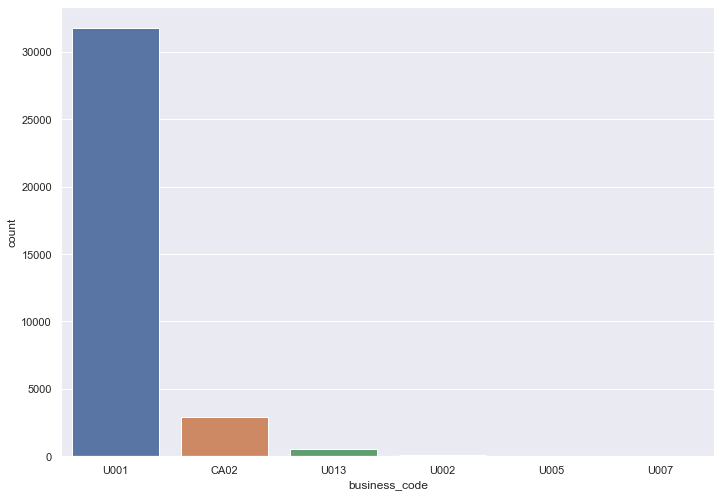

In [35]:
sns.countplot(x ='business_code', data = x_train)
#frequency of business_code=U001 is the highest in the dataset.

<AxesSubplot:xlabel='invoice_currency', ylabel='count'>

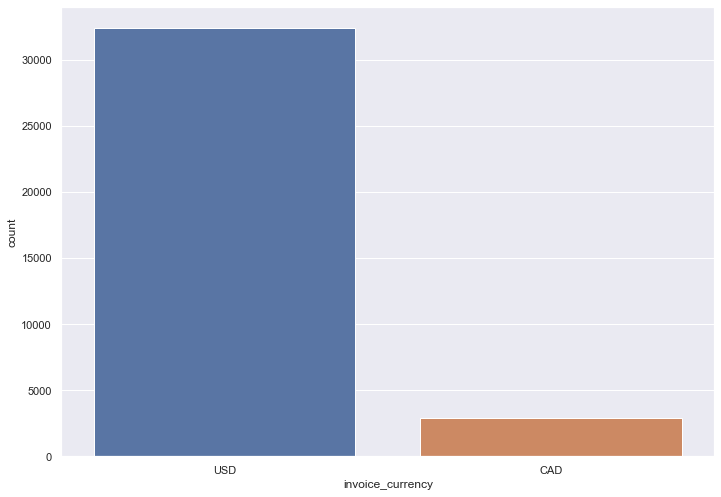

In [36]:
sns.countplot(x ='invoice_currency', data = x_train)
#Frequency of USD is much more in comparison to CAD but the presence of CAD is not negligible here(its not a quasi constant feature).

<AxesSubplot:xlabel='document_create_date.1', ylabel='count'>

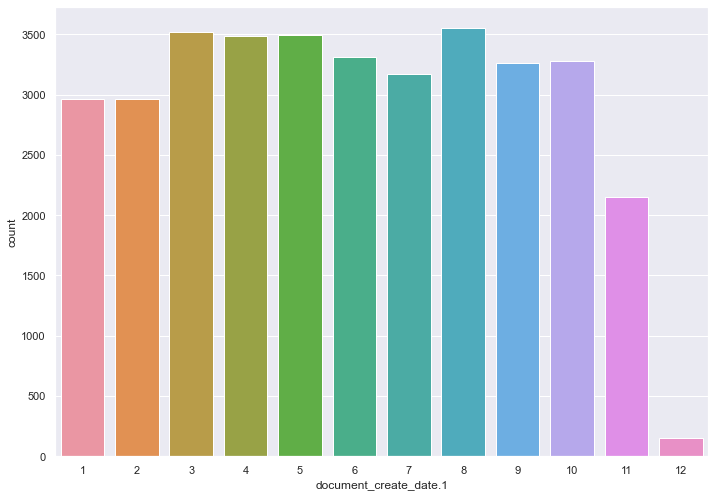

In [37]:
sns.countplot(x =x_train['document_create_date.1'].dt.month)
#Most of the invoices are created in the month of August.
#But every bar is of almost same length except for December, so we can say that most the least number of
#invoices are created in December
#No trend is found here as most of the bars are of nearly similar length.

<AxesSubplot:xlabel='document_create_date.1', ylabel='count'>

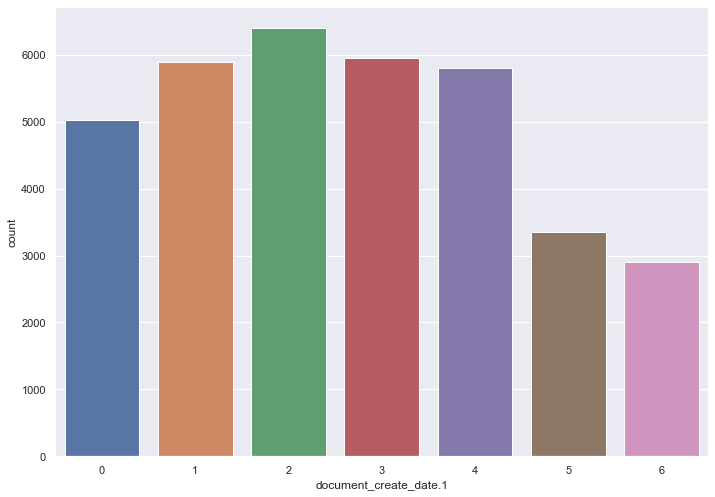

In [38]:
sns.countplot(x =x_train['document_create_date.1'].dt.weekday)
#Most of the  invoices are created on wednesday. But we can see that saturday and sunday have less invoices when compared 
#with other weekdays so a feature can be generated from here.

<AxesSubplot:xlabel='due_in_date', ylabel='count'>

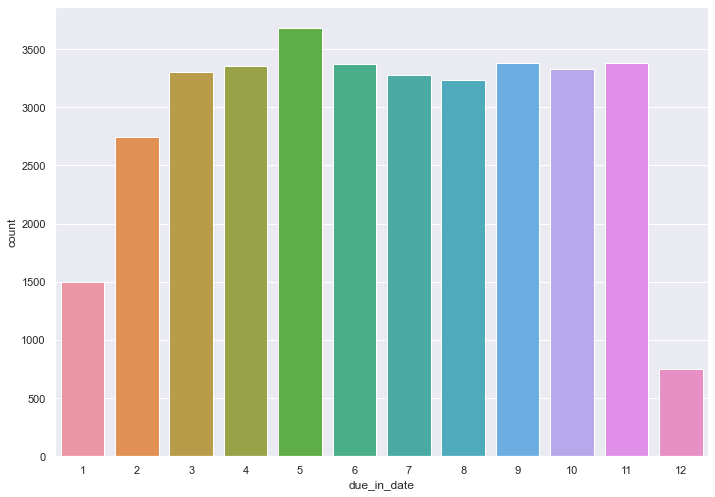

In [39]:
sns.countplot(x =x_train['due_in_date'].dt.month)
#Most of the due dates are in the month of may and least due dates are in the month of December.
#Since there is very less difference in the length of the bars of almost all the months so no feature can be derived from this.
#and if a feature is derived it wont variate much.

<AxesSubplot:xlabel='due_in_date', ylabel='count'>

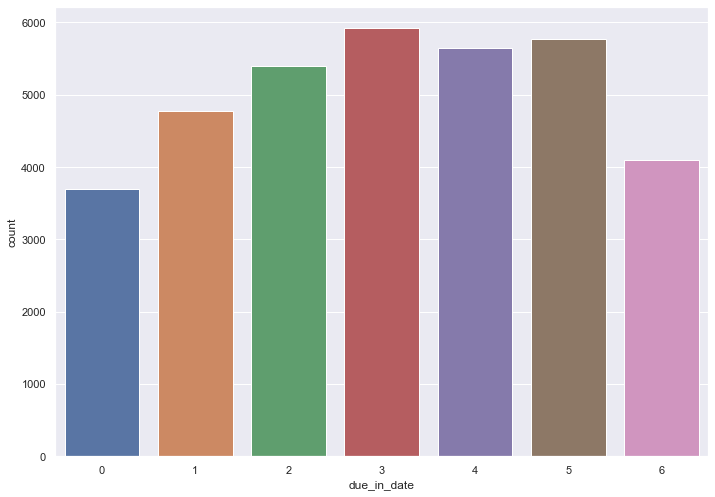

In [40]:
sns.countplot(x =x_train['due_in_date'].dt.weekday)
#Most of the  due dates are on Thursday. But, again some of the bars have very less differene in their length 
#so no feature can be derived from here.

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

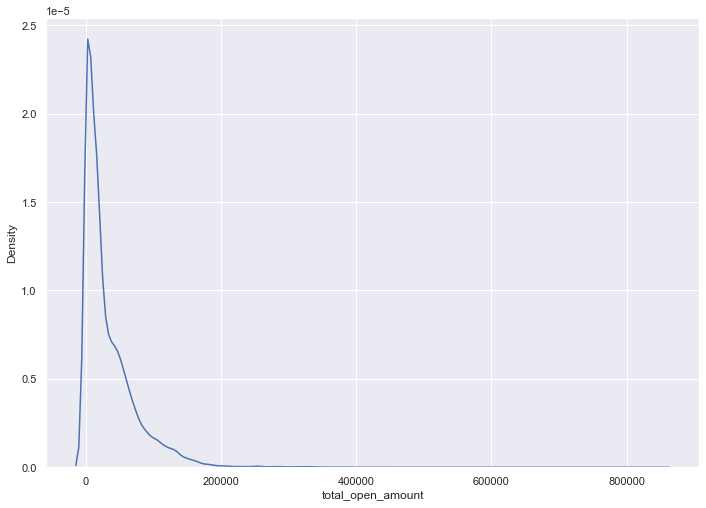

In [41]:
sns.kdeplot(x_train.total_open_amount)
#This plot is skewed will have to apply logarithmic conversion for converting it to gaussian format.

<AxesSubplot:xlabel='delay', ylabel='Density'>

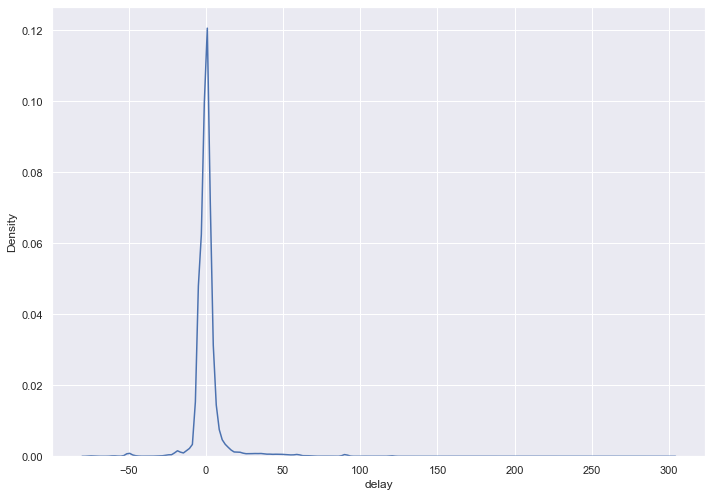

In [42]:
sns.kdeplot(y_train.delay)
#using the kde plot to check if train delay is in gaussian format or not.

In [43]:
#multivariate analysis

<AxesSubplot:xlabel='total_open_amount', ylabel='delay'>

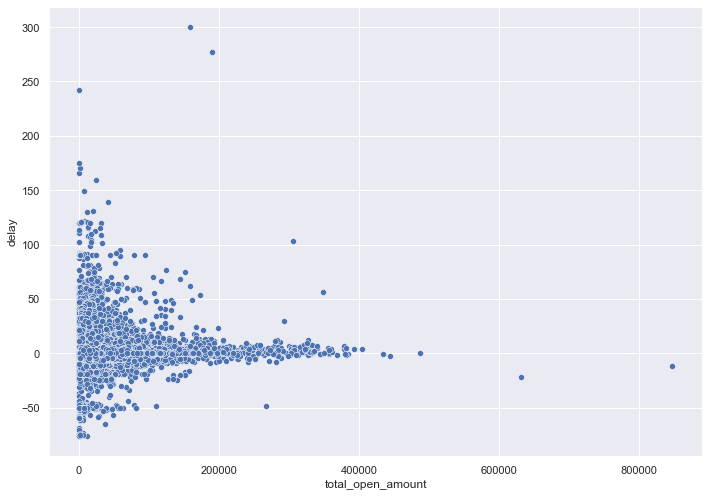

In [44]:
sns.scatterplot(x=x_train.total_open_amount,y=y_train.delay)
#total_amount_amount above 20000k have delay nearly 0 so can be used as a feature 


<AxesSubplot:xlabel='due_in_date', ylabel='document_create_date.1'>

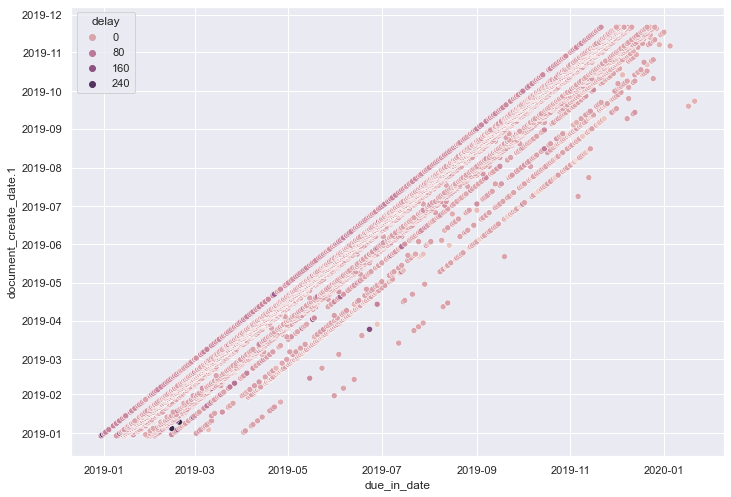

In [45]:
sns.scatterplot(x=x_train.due_in_date,y=x_train['document_create_date.1'],hue=y_train.delay)
#there is no feature present as due in date and document create date are highly correlated.

<AxesSubplot:xlabel='business_code', ylabel='delay'>

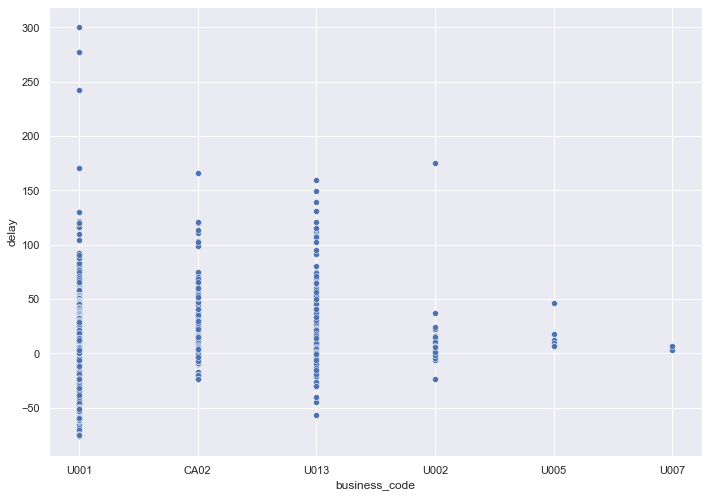

In [46]:
sns.scatterplot(x=x_train.business_code,y=y_train.delay)
#for this we will have to seggregate and then encode
#there is a feature present as target encoding will give an estimate of how much delay is there for a particular business code.

<AxesSubplot:xlabel='invoice_currency', ylabel='delay'>

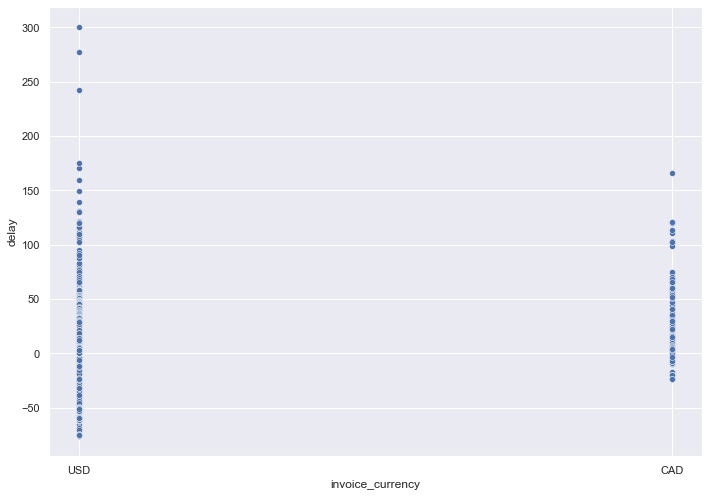

In [47]:
sns.scatterplot(x=x_train.invoice_currency,y=y_train.delay)
#canadian currency has more positive delay
#therefore could be used as a feature.

<AxesSubplot:xlabel='cust_payment_terms', ylabel='delay'>

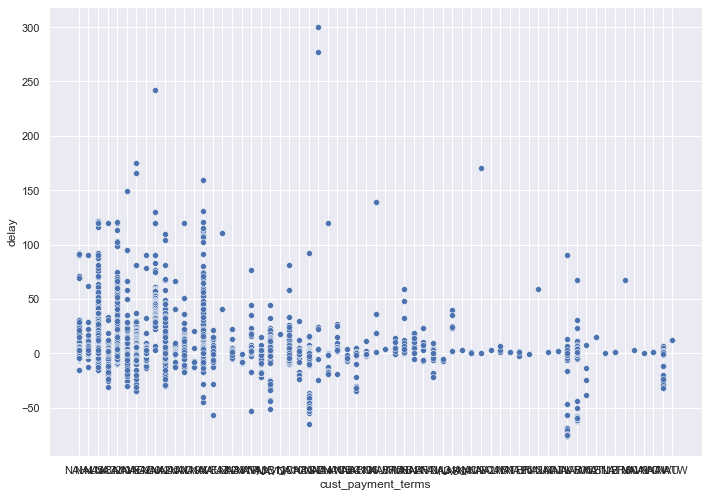

In [48]:
sns.scatterplot(x=x_train.cust_payment_terms,y=y_train.delay)
#some customers have more positive as well as negative delay
#so target encoding and one hot encoding on segregated payment terms will give a good feature.

<AxesSubplot:xlabel='due_in_date', ylabel='delay'>

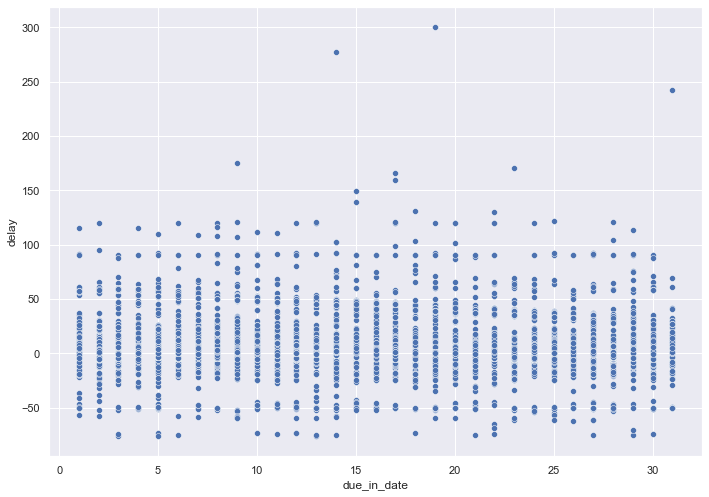

In [49]:
sns.scatterplot(x=x_train.due_in_date.dt.day,y=y_train.delay)

#here no feature can be derived.

#sns.scatterplot(x=x_train.due_in_date.dt.weekday,y=y_train.delay)
#sns.scatterplot(x=x_train.due_in_date.dt.month,y=y_train.delay)
#sns.scatterplot(x=x_train.due_in_date.dt.quarter,y=y_train.delay)
#sns.scatterplot(x=x_train.due_in_date.dt.quarter,y=y_train.delay)

#same analysis for day month and quareter(no feature can be derived from them)

# Capping of outliers,scaling and making columns that are gaussian in nature



<AxesSubplot:xlabel='delay'>

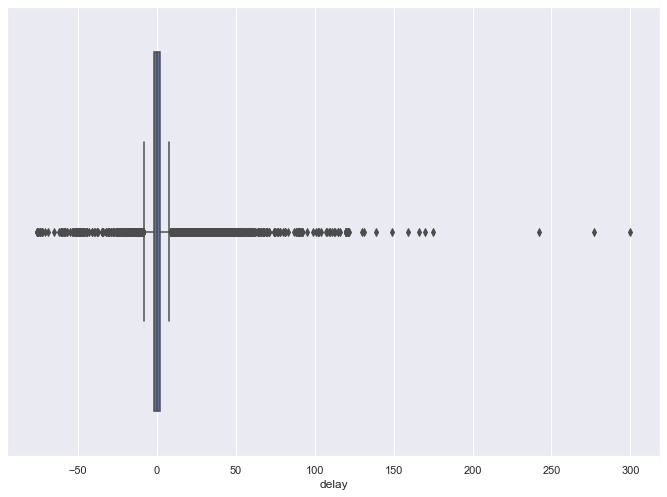

In [50]:
sns.boxplot(x=y_train.delay)

IQR = y_train['delay'].quantile(0.75) - y_train['delay'].quantile(0.25)
Upper=y_train['delay'].quantile(0.75)+3*IQR
Lower=y_train['delay'].quantile(0.25)-3*IQR


In [51]:
Upper=120
Lower=-75
y_train.delay=y_train.delay.clip(Upper,Lower)
#through the boxplot we can analyse that
# Very varied outlier lies in the range of above 120 and below -75
# so we will cap it for better results.
y_train.delay.describe()

count    35311.000000
mean         1.182719
std         10.966470
min        -75.000000
25%         -2.000000
50%          0.000000
75%          2.000000
max        120.000000
Name: delay, dtype: float64

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

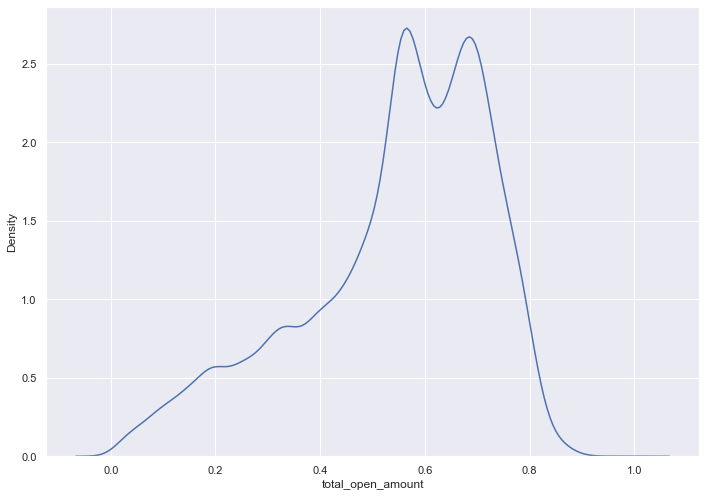

In [52]:
def amountscalar(df):
    df.total_open_amount=np.where(df['invoice_currency']=='CAD',0.78*df.total_open_amount,df.total_open_amount)
    df['total_open_amount'] = np.log(df['total_open_amount']+100) 
    max1=df['total_open_amount'].max()
    min1=df['total_open_amount'].min()
    df['total_open_amount']=(df['total_open_amount']-min1)/(max1-min1)
amountscalar(x_train)    
sns.kdeplot(x_train['total_open_amount'])
#first converting the CAD currency to Dollars so that the prediction can be more accurate.
#then using min-max scalar to scale the total_open_amount so that the biasness of this feature is removed.

# Feature Engineering


In [53]:
x_train['business_code'].unique()
#finding a pattern so that we can break the terms of business_code as dummy encoding 6 new columns would hinder time compeletion
#performance of our model


array(['U001', 'CA02', 'U013', 'U002', 'U005', 'U007'], dtype=object)

<AxesSubplot:xlabel='business_code_2', ylabel='delay'>

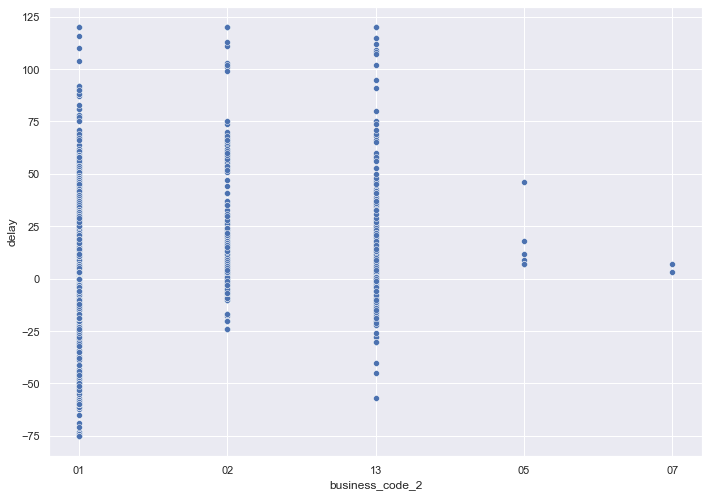

In [54]:
x_train['business_code_1']=x_train.business_code.str[:2]
x_train['business_code_2']=x_train.business_code.str[2:]
sns.scatterplot(x=x_train.business_code_2,y=y_train.delay)
#dividing into two parts

In [55]:
map_bc_1={'CA':0,'U0':1}
#label encoding the first part as it has only two unique values.
x_train['business_code_1']=x_train['business_code_1'].map(map_bc_1)
#mapping it.
temp=pd.concat([x_train.business_code_2,y_train.delay],axis=1)
map_bc_2=temp.groupby("business_code_2")['delay'].mean().to_dict()
x_train['business_code_2']=x_train['business_code_2'].map(map_bc_2)
#target encoding the second part and then mapping it
x_train.drop(['business_code'],axis=1,inplace=True)

In [56]:
temp=pd.concat([x_train.cust_number,y_train.delay],axis=1)
map_cust=temp.groupby("cust_number")['delay'].mean().to_dict()
x_train['cust_number']=x_train['cust_number'].map(map_cust)
#target encoding the customer number so that the average delay per unique customer can be used as a feature

In [57]:
print(x_train['invoice_currency'].unique())
map_currency={'CAD':0,'USD':1}
#label encoding the currency
x_train['invoice_currency']=x_train['invoice_currency'].map(map_currency)
#mapping the currency as it was shown in the eda that CAD has more positive delay than USD


['USD' 'CAD']


In [58]:
x_train['weekday']=x_train['document_create_date.1'].dt.weekday.apply(lambda x: x==5 or x==6,1,0)
x_train['weekday']=x_train['weekday'].astype(int)
#creating a feature out of weekday eda analysis

In [59]:
x_train['cust_payment_terms_1']=x_train['cust_payment_terms'].str[0:2]
x_train['cust_payment_terms_1'].unique()

array(['NA', 'CA', 'C1', 'BR', 'B0', 'B1'], dtype=object)

In [60]:
x_train = pd.get_dummies(x_train, columns=['cust_payment_terms_1'])
#one hot encoding using pd.get_dummies()

In [61]:
x_train['cust_payment_terms_2']=x_train['cust_payment_terms'].str[2:3]
print(x_train['cust_payment_terms_2'].unique())
temp=pd.concat([x_train.cust_payment_terms_2,y_train.delay],axis=1)
mapper_cust2=temp.groupby("cust_payment_terms_2")['delay'].mean().to_dict()
x_train['cust_payment_terms_2']=x_train['cust_payment_terms_2'].map(mapper_cust2)

['H' 'U' 'A' '3' '1' 'V' 'G' 'C' 'X' 'D' '9' 'W' '2' '8' 'B' '0' '5' 'N'
 'T' '6']


In [62]:
x_train['cust_payment_terms_3']=x_train['cust_payment_terms'].str[3:]
print(x_train['cust_payment_terms_2'].unique())
temp=pd.concat([x_train.cust_payment_terms_3,y_train.delay],axis=1)
mapper_cust3=temp.groupby("cust_payment_terms_3")['delay'].mean().to_dict()
x_train['cust_payment_terms_3']=x_train['cust_payment_terms_3'].map(mapper_cust3)


[-1.87772512  1.3699187   1.13987669 -4.05147059  5.31819615  4.64150943
 -1.33461835  0.48142292 44.23954373  3.27643979 -4.44444444 -8.10289389
  2.71428571  8.57142857  0.13636364 -0.23809524 -2.30769231  3.
  4.4375     67.        ]


In [63]:
temp=pd.concat([x_train.cust_payment_terms,y_train.delay],axis=1)
mapper_cust0=temp.groupby("cust_payment_terms")['delay'].mean().to_dict()
x_train['cust_payment_terms']=x_train['cust_payment_terms'].map(mapper_cust0)
#also target encoding the whole customer payment terms rather than just dropping it.
#if it is highly correlated with its part then it will be reomoved later in feature selection.

In [64]:
x_train['amountclassifier']=np.where(x_train['total_open_amount']>=200000,1,0)
#creating a feature of the eda analysis that was done on total_open_amount

In [65]:
drop1=drop1+['cust_payment_terms_1_B0']
#dropping one of the dummy encoded columns to evade from 'dummy trap'.

In [66]:
x_train['document_create_date.1_month'] = x_train['document_create_date.1'].dt.month
x_train['document_create_date.1_day'] = x_train['document_create_date.1'].dt.day
x_train['document_create_date.1_weekday'] = x_train['document_create_date.1'].dt.weekday
#making features out of document create date.1

In [67]:
x_train['due_in_date_month'] = x_train['due_in_date'].dt.month
x_train['due_in_date_day'] = x_train['due_in_date'].dt.day
x_train['due_in_date_weekday'] = x_train['due_in_date'].dt.weekday
#making features out of due in date.

In featuring of datetime datatype columns year is not taken as a feature as we have to predict future values(here year is 2018 and 2019 but we are predicting for 2020).

In [68]:
drop1=drop1+['due_in_date','document_create_date.1']
#adding the date time in the drop list

In [69]:
x_train[set(x_train.columns)-set(drop1)].dtypes
#checking if all the features present in the dataset are of only integer and float values.

cust_payment_terms_1_BR             uint8
document_create_date.1_month        int64
cust_payment_terms_1_NA             uint8
cust_payment_terms_2              float64
total_open_amount                 float64
cust_payment_terms_1_B1             uint8
amountclassifier                    int32
document_create_date.1_weekday      int64
due_in_date_month                   int64
weekday                             int32
invoice_currency                    int64
business_code_1                     int64
cust_payment_terms_1_CA             uint8
cust_payment_terms_3              float64
due_in_date_weekday                 int64
due_in_date_day                     int64
document_create_date.1_day          int64
cust_number                       float64
business_code_2                   float64
cust_payment_terms_1_C1             uint8
cust_payment_terms                float64
dtype: object

# Feature Selection 

# Filter method

<AxesSubplot:>

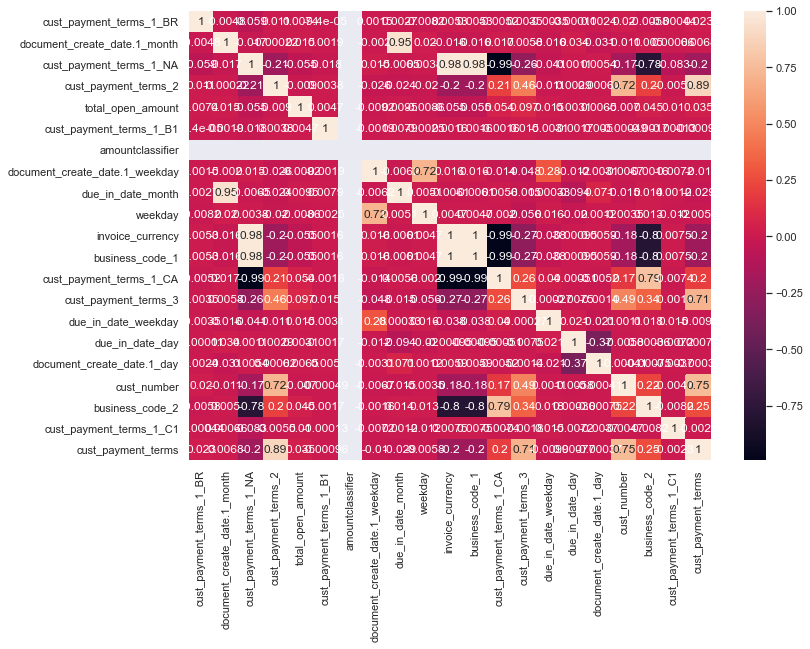

In [70]:
#visualisation
corr=x_train[set(x_train.columns)-set(drop1)].corr()
sns.heatmap(corr,annot=True)

In [71]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0.01)
constant_filter.fit(x_train[set(x_train.columns)-set(drop1)])
k=set(x_train[set(x_train.columns)-set(drop1)].columns[constant_filter.get_support()])
k
#removing the constant and quasi constant features using variance threshold 

{'business_code_1',
 'business_code_2',
 'cust_number',
 'cust_payment_terms',
 'cust_payment_terms_1_CA',
 'cust_payment_terms_1_NA',
 'cust_payment_terms_2',
 'cust_payment_terms_3',
 'document_create_date.1_day',
 'document_create_date.1_month',
 'document_create_date.1_weekday',
 'due_in_date_day',
 'due_in_date_month',
 'due_in_date_weekday',
 'invoice_currency',
 'total_open_amount',
 'weekday'}

# Wrapper method

In [72]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=7,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
sfs.fit(x_train[set(x_train.columns)-set(drop1)], y_train)
k=set(sfs.k_feature_names_)

In [73]:
sfs.k_feature_names_

('document_create_date.1_month',
 'cust_payment_terms_2',
 'total_open_amount',
 'due_in_date_month',
 'due_in_date_day',
 'cust_number',
 'cust_payment_terms')

# Embedded Metod

# Creating a function to map feature engineering to validation set and test set by using the same mappers that were created in the train set  

In [74]:
def mapper(df):
    df['business_code_1']=df.business_code.str[:2]
    df['business_code_2']=df.business_code.str[2:]
    df['business_code_1']=df['business_code_1'].map(map_bc_1)
    df['business_code_2']=df['business_code_2'].map(map_bc_2)
    df['invoice_currency']=df['invoice_currency'].map(map_currency)
    df['cust_number']=df['cust_number'].map(map_cust)
    df['cust_payment_terms_1']=df['cust_payment_terms'].str[0:2]
    df['cust_payment_terms_2']=df['cust_payment_terms'].str[2:3]
    df['cust_payment_terms_3']=df['cust_payment_terms'].str[3:]
    df = pd.get_dummies(df, columns=['cust_payment_terms_1'])
    df['cust_payment_terms_2']=df['cust_payment_terms_2'].map(mapper_cust2)
    df['cust_payment_terms_3']=df['cust_payment_terms_3'].map(mapper_cust3)
    df['cust_payment_terms']=df['cust_payment_terms'].map(mapper_cust0)
    df['amountclassifier']=np.where(df['total_open_amount']>=200000,1,0)
    df['document_create_date.1_month'] = df['document_create_date.1'].dt.month
    df['document_create_date.1_day'] = df['document_create_date.1'].dt.day
    df['document_create_date.1_weekday'] = df['document_create_date.1'].dt.weekday
    df['weekday']=df['document_create_date.1'].dt.weekday.apply(lambda x: x==5 or x==6,1,0)
    df['weekday']=df['weekday'].astype(int)
    df['due_in_date_month'] = df['due_in_date'].dt.month
    df['due_in_date_day'] = df['due_in_date'].dt.day
    df['due_in_date_weekday'] = df['due_in_date'].dt.weekday
    amountscalar(df)
    return df


Creating a function to if the features selected are common with the test mapped columns and if there are some features found that are not common then they are removed.

In [75]:
def checkfeatures(df):
    return(k.intersection(df.columns))

# Hyper Parameter Tuning

In [76]:
def tuning(df):
    return df.fillna(y_test['delay'].mean())
#Replacing the nan values that are occured in mapping because of new variables by delay mean as the nan values will always occur
#in my data set when target encoding is done.

In [77]:
# We are using xpg boost as it is found later that this model runs best on our dataset so we are using it temporaily for tuning
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
x_val=mapper(x_val)
p=checkfeatures(x_val)
x_val=tuning(x_val[p])
clf = xgb.XGBRegressor()
clf.fit(x_train[p], y_train.delay)
tempo1=clf.predict(x_val)
tempo1predicted=np.sqrt(mean_squared_error(y_val.delay, tempo1))


In [78]:
clf = xgb.XGBRegressor( base_score=0.52, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.30, max_delta_step=0, max_depth=6,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=9)
clf.fit(x_train[p], y_train.delay)
tempo2=clf.predict(x_val)
tempo2predicted=np.sqrt(mean_squared_error(y_val.delay, tempo2))
#after many hit and trial it was found by me that only tuning base score from 0.50 to 0.52 decreases my rmsc value.
#and if i was using my objective as gb linear my model was highly overfitted.

In [79]:
tempo1predicted
# without parameter tuning

6.172294

In [80]:
tempo2predicted
#with parameter tuning.

6.037682

#  Modeling

In [81]:
# Modeling & Accuracy Metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [82]:
# Defining Lists to Store in the Results and Names of Algorithms
MSE_Score = []
R2_Score = []
Algorithm = []

In [83]:
#applying all the models
def models(df):
    # Fitting Simple Linear Regression to the Training Set
    Algorithm.append('Linear Regression')
    clf = LinearRegression()
    clf.fit(x_train[p], y_train.delay)
    # Predicting the Test Set Results
    predicted = clf.predict(df)
    MSE_Score.append(mean_squared_error(y_test, predicted))
    R2_Score.append(r2_score(y_test, predicted))
    Algorithm.append('Support Vector Regression')
    clf = SVR()
    clf.fit(x_train[p], y_train.delay)
    # Predicting the Test Set Results
    predicted = clf.predict(df)
    MSE_Score.append(mean_squared_error(y_test, predicted))
    R2_Score.append(r2_score(y_test, predicted))
    # Fitting Decision Tree to the Training Set
    Algorithm.append('Decision Tree Regressor')
    clf = DecisionTreeRegressor()
    clf.fit(x_train[p], y_train.delay)
    # Predicting the Test Set Results
    predicted = clf.predict(df)
    MSE_Score.append(mean_squared_error(y_test, predicted))
    R2_Score.append(r2_score(y_test, predicted))
    # Fitting Random Forest Regressor Tree to the Training Set
    Algorithm.append('Random Forest Regressor')
    clf = RandomForestRegressor()
    clf.fit(x_train[p], y_train.delay)
    # Predicting the Test Set Results
    predicted = clf.predict(df)
    MSE_Score.append(mean_squared_error(y_test, predicted))
    R2_Score.append(r2_score(y_test, predicted))
    # Fitting XGBoost Regressor to the Training Set
    Algorithm.append('XGB Regressor')
    clf = xgb.XGBRegressor(base_score=0.52, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.30, max_delta_step=0, max_depth=6,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=8)
    clf.fit(x_train[p], y_train.delay)
    # Predicting the Test Set Results
    predicted = clf.predict(df)
    MSE_Score.append(mean_squared_error(y_test, predicted))
    R2_Score.append(r2_score(y_test, predicted))
    # Just Combining the Lists into a DataFrame for a Better Visualisation
    Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])
    Comparison['RMSE_Score']=np.sqrt(Comparison['MSE_Score'])
    return(Comparison,predicted)

Map->Tune->Implementation in the model

In [84]:
x_test=mapper(x_test)
p=checkfeatures(x_test)
x_test=tuning(x_test[p])
# Mapping and tuning our test set

In [85]:
#applying all the models and then clarifying why the best performing model is the best
df2,predicted=models(x_test)
df2

,Algorithm,MSE_Score,R2_Score,RMSE_Score
0,Linear Regression,70.011523,0.427699,8.367289
1,Support Vector Regression,71.234948,0.417699,8.440080
2,Decision Tree Regressor,112.686984,0.078854,10.615413
3,Random Forest Regressor,66.714544,0.454650,8.167897
4,XGB Regressor,65.249886,0.466623,8.077740


In [86]:
clf = xgb.XGBRegressor( base_score=0.52, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.30, max_delta_step=0, max_depth=6,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=8)
clf.fit(x_train[p], y_train.delay)
z = clf.predict(x_train[p])
predicted3=np.sqrt(mean_squared_error(y_train.delay, z))
#calculating the rmsc on test also so that we can check if the model is overfitted or not(if it is overfitted then the
#difference beween them will be large).

In [87]:
print('Train-',predicted3,'Val-',tempo2predicted,'Test-',df2.iloc[4,3])

Train- 4.893249 Val- 6.037682 Test- 8.077740126983663


In [88]:
def output(pred):
    k=pd.DataFrame({'Predicted delay':np.floor(pred)})
    bins=[-500,16,31,46,61,500]
    labe=['0-15 days','16-30 days','31-45 days','46-60 days','>60 days']
    k['Aging Bucket'] = pd.cut(k['Predicted delay'],bins,labels=labe,right=False)
    return k
#bucketing the values in terms of the predicted delay

In [89]:
def additionofclearingdate(df,a):
    a['clear_date_Predicted']=df.due_in_date.values+pd.to_timedelta(a['Predicted delay'], unit='D')
#calculating the predicted clearing date by adding the due in date to the predicted delay 

In [90]:
la=output(predicted)
additionofclearingdate(x1test,la)
la
#applying the fuctions on the test

,Predicted delay,Aging Bucket,clear_date_Predicted
0,-4.0,0-15 days,2020-01-24
1,2.0,0-15 days,2020-01-30
2,-3.0,0-15 days,2020-01-25
3,6.0,0-15 days,2020-02-03
4,0.0,0-15 days,2020-01-28
...,...,...,...
4355,1.0,0-15 days,2020-03-14
4356,-1.0,0-15 days,2020-03-12
4357,0.0,0-15 days,2020-03-13
4358,-1.0,0-15 days,2020-03-12


In [91]:
Test1.duplicated().sum()
#checking of the rows are duplicated or not in my case it was 0 so i did not implement a duplicate dropping function

0

# Applying all the methods on the main test to predict the clearing date and buckets as given in the problem statement

In [92]:
Test1=todatetime(Test1)
TEST1=Test1.copy()
#copying the main test dataset to another dataframe as after mapping,it is tiresome to again convert due in date to datetime format
#to calculate the predicted clearing date

In [93]:
def sanity(df):
    df=df[df['due_in_date'] >= df['document_create_date.1']]
    df=df[df['due_in_date'] >= df['posting_date']]
    df=df[df['due_in_date'] >= df['baseline_create_date']]
    df=df[df['baseline_create_date'] >= df['document_create_date.1']]
    df=df[df['baseline_create_date'] >= df['posting_date']]
    df=df[df['posting_date'] >= df['document_create_date.1']]
    return df
#Test1=sanity(Test1)
#Test1.shape[0]
#i did not perform sanity checking on the main test case just included the function in case we have to perfom the sanity function
#later.

In [94]:
Test1=mapper(Test1)
p=checkfeatures(Test1)
print(Test1[p].isna().sum())
Test1=tuning(Test1[p])
#mapping and tuning the main test dataset

due_in_date_month                 0
total_open_amount                 0
cust_payment_terms              176
due_in_date_day                   0
cust_number                     157
document_create_date.1_month      0
cust_payment_terms_2            175
dtype: int64


In [95]:
clf = xgb.XGBRegressor(base_score=0.52, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.30, max_delta_step=0, max_depth=6,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=8)
clf.fit(x_train[p], y_train.delay)
mainpredicted=clf.predict(Test1)
#applying the model

In [96]:
final=output(mainpredicted)
additionofclearingdate(TEST1,final)
#calculating clearing date and buckets

In [97]:
final[['Aging Bucket','clear_date_Predicted']]
#printing the final output

,Aging Bucket,clear_date_Predicted
0,0-15 days,2020-05-17
1,0-15 days,2020-04-09
2,0-15 days,2020-05-17
3,0-15 days,2020-04-25
4,0-15 days,2020-05-14
...,...,...
4342,0-15 days,2020-03-18
4343,0-15 days,2020-03-12
4344,0-15 days,2020-05-01
4345,0-15 days,2020-04-30
